In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
import time
%matplotlib inline

os.chdir('..\..\..\..')

from input_configuration import base_year

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [2]:
# Create timestamp to show when this summary was run
print('Summary run: ' + time.strftime("%a, %d %b %Y %H:%M"))

Summary run: Wed, 04 May 2022 17:59


In [3]:
working_dir = r'outputs/agg/dash'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.1%}".format

# Workers by County

In [4]:
df_wfh = pd.read_csv(os.path.join(working_dir,'wfh_county.csv'))
df_wfh_survey = pd.read_csv(os.path.join(working_dir,'survey','wfh_county.csv'))

# Total Workers by County
df_tot = pd.read_csv(os.path.join(working_dir,'pptyp_county.csv'))
df_tot = df_tot[df_tot['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df_tot = df_tot.groupby('person_county').sum()[['psexpfac']].reset_index()
total_nonwfh_workers = df_tot.sum()['psexpfac']

df_tot_survey = pd.read_csv(os.path.join(working_dir,'survey','pptyp_county.csv'))
df_tot_survey = df_tot_survey[df_tot_survey['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df_tot_survey = df_tot_survey.groupby('person_county').sum()[['psexpfac']].reset_index()
total_nonwfh_workers_survey = df_tot_survey.sum()['psexpfac']

df = df_wfh.merge(df_tot, on='person_county')
df.index = df['person_county']
df.drop('person_county', axis=1,inplace=True)
df.columns = ['WFH Workers', 'Total Workers']
df.loc['Region'] = df.sum(axis=0)
df['% WFH Workers'] = (df['WFH Workers']/df['Total Workers']).apply(format_percent)
df

,WFH Workers,Total Workers,% WFH Workers
person_county,,,
King,"56,862","1,061,884",5.4%
Kitsap,"13,090","108,598",12.1%
Pierce,"27,295","367,265",7.4%
Snohomish,"26,522","368,992",7.2%
Region,"123,769","1,906,739",6.5%


# Tour Rate for Work-at-Home Workers

In [5]:
df_tours = pd.read_csv(os.path.join(working_dir,'work_from_home_tours.csv'))
total_wfh_workers = df_wfh.psexpfac.sum()
df = df_tours.groupby('pdpurp').sum()[['toexpfac']].reset_index()
df['tour_rate'] = df['toexpfac']/total_wfh_workers
df

df_tours_survey = pd.read_csv(os.path.join(working_dir,'survey','work_from_home_tours.csv'))
total_wfh_workers_survey = df_wfh.psexpfac.sum()
df_survey = df_tours_survey.groupby('pdpurp').sum()[['toexpfac']].reset_index()
df_survey['tour_rate'] = df_survey['toexpfac']/total_wfh_workers_survey
df = df.merge(df_survey,on='pdpurp',suffixes=['_model','_survey'])
df.rename(columns={'toexpfac_model': 'tours_model', 'toexpfac_survey': 'tours_survey'}, inplace=True)
df['tours_survey'] = df['tours_survey'].astype('int')
df[['pdpurp','tours_model','tours_survey','tour_rate_model','tour_rate_survey']]
for col in ['tour_rate_model','tour_rate_survey']:
    df[col] = df[col].apply("{:,.2f}".format)
df

,pdpurp,tours_model,tour_rate_model,tours_survey,tour_rate_survey
0,Escort,"45,273",0.37,23855,0.19
1,Meal,"6,078",0.05,13883,0.11
2,Personal Business,"30,776",0.25,37346,0.30
3,School,"2,848",0.02,687,0.01
4,Shop,"38,601",0.31,51688,0.42
5,Social,"37,729",0.30,76994,0.62
6,Work,"13,395",0.11,25335,0.20


## Pierce County

In [6]:
df_tours = pd.read_csv(os.path.join(working_dir,'work_from_home_tours.csv'))
df_tours = df_tours.loc[df_tours.person_county=='Pierce']
total_wfh_workers = df_wfh.psexpfac.sum()
df = df_tours.groupby('pdpurp').sum()[['toexpfac']].reset_index()
df['tour_rate'] = df['toexpfac']/total_wfh_workers
df

df_tours_survey = pd.read_csv(os.path.join(working_dir,'survey','work_from_home_tours.csv'))
df_tours_survey = df_tours_survey.loc[df_tours_survey.person_county=='Pierce']
total_wfh_workers_survey = df_wfh.psexpfac.sum()
df_survey = df_tours_survey.groupby('pdpurp').sum()[['toexpfac']].reset_index()
df_survey['tour_rate'] = df_survey['toexpfac']/total_wfh_workers_survey
df = df.merge(df_survey,on='pdpurp',suffixes=['_model','_survey'])
df.rename(columns={'toexpfac_model': 'tours_model', 'toexpfac_survey': 'tours_survey'}, inplace=True)
df['tours_survey'] = df['tours_survey'].astype('int')
df[['pdpurp','tours_model','tours_survey','tour_rate_model','tour_rate_survey']]
for col in ['tour_rate_model','tour_rate_survey']:
    df[col] = df[col].apply("{:,.2f}".format)
df

,pdpurp,tours_model,tour_rate_model,tours_survey,tour_rate_survey
0,Escort,"10,234",0.08,5952,0.05
1,Meal,"1,216",0.01,1522,0.01
2,Personal Business,"6,534",0.05,2092,0.02
3,Shop,"8,331",0.07,7803,0.06
4,Social,"7,954",0.06,11734,0.09
5,Work,"3,076",0.02,6945,0.06


## Other Counties

In [7]:
df_tours = pd.read_csv(os.path.join(working_dir,'work_from_home_tours.csv'))
df_tours = df_tours.loc[df_tours.person_county!='Pierce']
total_wfh_workers = df_wfh.psexpfac.sum()
df = df_tours.groupby('pdpurp').sum()[['toexpfac']].reset_index()
df['tour_rate'] = df['toexpfac']/total_wfh_workers
df

df_tours_survey = pd.read_csv(os.path.join(working_dir,'survey','work_from_home_tours.csv'))
df_tours_survey = df_tours_survey.loc[df_tours_survey.person_county!='Pierce']
total_wfh_workers_survey = df_wfh.psexpfac.sum()
df_survey = df_tours_survey.groupby('pdpurp').sum()[['toexpfac']].reset_index()
df_survey['tour_rate'] = df_survey['toexpfac']/total_wfh_workers_survey
df = df.merge(df_survey,on='pdpurp',suffixes=['_model','_survey'])
df.rename(columns={'toexpfac_model': 'tours_model', 'toexpfac_survey': 'tours_survey'}, inplace=True)
df['tours_survey'] = df['tours_survey'].astype('int').apply('{:0,.0f}'.format)
df[['pdpurp','tours_model','tours_survey','tour_rate_model','tour_rate_survey']]
for col in ['tour_rate_model','tour_rate_survey']:
    df[col] = df[col].apply("{:,.2f}".format)
df

,pdpurp,tours_model,tour_rate_model,tours_survey,tour_rate_survey
0,Escort,"35,039",0.28,17902,0.14
1,Meal,"4,862",0.04,12360,0.10
2,Personal Business,"24,242",0.20,35253,0.28
3,School,"2,236",0.02,687,0.01
4,Shop,"30,270",0.24,43885,0.35
5,Social,"29,775",0.24,65259,0.53
6,Work,"10,319",0.08,18389,0.15


### Tour Rates for Workers that do NOT WF

In [8]:
# Tour Rates by purpose by worker type
df = pd.read_csv(os.path.join(working_dir,'non_wfh_tours.csv'))
df = df[df['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df = df.groupby('pdpurp').sum().reset_index()
df['tour_rate'] = df['toexpfac']/df_tot.sum()[['psexpfac']].values[0]

df_survey = pd.read_csv(os.path.join(working_dir,'survey','non_wfh_tours.csv'))
df_survey = df_survey[df_survey['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df_survey = df_survey.groupby('pdpurp').sum().reset_index()
df_survey['tour_rate'] = df_survey['toexpfac']/df_tot_survey.sum()[['psexpfac']].values[0]

df = df.merge(df_survey, on='pdpurp', suffixes=['_model','_survey'])
df.rename(columns={'toexpfac_model':'total_tours_model','toexpfac_survey':'total_tours_survey'},
         inplace=True)
# df[['pdpurp','total_tours_model','total_tours_survey','tour_rate_model','tour_rate_survey']]
for col in ['tour_rate_model','tour_rate_survey']:
    df[col] = df[col].apply("{:,.2f}".format)
df

,pdpurp,total_tours_model,tour_rate_model,total_tours_survey,tour_rate_survey
0,Escort,"209,666",0.11,"174,143",0.09
1,Meal,"335,415",0.18,"239,952",0.13
2,Personal Business,"175,636",0.09,"269,849",0.14
3,School,"25,972",0.01,"15,975",0.01
4,Shop,"235,862",0.12,"249,110",0.13
5,Social,"483,066",0.25,"454,542",0.24
6,Work,"1,637,493",0.86,"1,903,086",1.01


## Pierce County

In [9]:
# Tour Rates by purpose by worker type
df = pd.read_csv(os.path.join(working_dir,'non_wfh_tours.csv'))
df = df.loc[df.person_county=='Pierce']
df = df[df['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df = df.groupby('pdpurp').sum().reset_index()
df['tour_rate'] = df['toexpfac']/df_tot.sum()[['psexpfac']].values[0]

df_survey = pd.read_csv(os.path.join(working_dir,'survey','non_wfh_tours.csv'))
df_survey = df_survey[df_survey['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df_survey = df_survey.groupby('pdpurp').sum().reset_index()
df_survey['tour_rate'] = df_survey['toexpfac']/df_tot_survey.sum()[['psexpfac']].values[0]

df = df.merge(df_survey, on='pdpurp', suffixes=['_model','_survey'])
df.rename(columns={'toexpfac_model':'total_tours_model','toexpfac_survey':'total_tours_survey'},
         inplace=True)
# df[['pdpurp','total_tours_model','total_tours_survey','tour_rate_model','tour_rate_survey']]
for col in ['tour_rate_model','tour_rate_survey']:
    df[col] = df[col].apply("{:,.2f}".format)
df

,pdpurp,total_tours_model,tour_rate_model,total_tours_survey,tour_rate_survey
0,Escort,"40,289",0.02,"174,143",0.09
1,Meal,"51,522",0.03,"239,952",0.13
2,Personal Business,"31,640",0.02,"269,849",0.14
3,School,"5,853",0.00,"15,975",0.01
4,Shop,"41,251",0.02,"249,110",0.13
5,Social,"81,991",0.04,"454,542",0.24
6,Work,"283,296",0.15,"1,903,086",1.01


## Other Counties

In [10]:
# Tour Rates by purpose by worker type
df = pd.read_csv(os.path.join(working_dir,'non_wfh_tours.csv'))
df = df.loc[df.person_county!='Pierce']
df = df[df['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df = df.groupby('pdpurp').sum().reset_index()
df['tour_rate'] = df['toexpfac']/df_tot.sum()[['psexpfac']].values[0]

df_survey = pd.read_csv(os.path.join(working_dir,'survey','non_wfh_tours.csv'))
df_survey = df_survey[df_survey['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df_survey = df_survey.groupby('pdpurp').sum().reset_index()
df_survey['tour_rate'] = df_survey['toexpfac']/df_tot_survey.sum()[['psexpfac']].values[0]

df = df.merge(df_survey, on='pdpurp', suffixes=['_model','_survey'])
df.rename(columns={'toexpfac_model':'total_tours_model','toexpfac_survey':'total_tours_survey'},
         inplace=True)
# df[['pdpurp','total_tours_model','total_tours_survey','tour_rate_model','tour_rate_survey']]
for col in ['tour_rate_model','tour_rate_survey']:
    df[col] = df[col].apply("{:,.2f}".format)
df

,pdpurp,total_tours_model,tour_rate_model,total_tours_survey,tour_rate_survey
0,Escort,"169,377",0.09,"174,143",0.09
1,Meal,"283,893",0.15,"239,952",0.13
2,Personal Business,"143,996",0.08,"269,849",0.14
3,School,"20,119",0.01,"15,975",0.01
4,Shop,"194,611",0.10,"249,110",0.13
5,Social,"401,075",0.21,"454,542",0.24
6,Work,"1,354,197",0.71,"1,903,086",1.01


### Tour Rates for Non-Workers

In [11]:
df = pd.read_csv(os.path.join(working_dir,'non_wfh_tours.csv'))
df = df[-df['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df = df.groupby('pdpurp').sum().reset_index()
df['tour_rate'] = df['toexpfac']/df_tot_survey.sum()[['psexpfac']].values[0]


df_survey = pd.read_csv(os.path.join(working_dir,'survey','non_wfh_tours.csv'))
df_survey = df_survey[-df_survey['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df_survey = df_survey.groupby('pdpurp').sum().reset_index()
df_survey['tour_rate'] = df_survey['toexpfac']/df_tot_survey.sum()[['psexpfac']].values[0]

df = df.merge(df_survey, on='pdpurp', suffixes=['_model','_survey'])
df.rename(columns={'toexpfac_model':'total_tours_model','toexpfac_survey':'total_tours_survey'},
         inplace=True)
for col in ['tour_rate_model','tour_rate_survey']:
    df[col] = df[col].apply("{:,.2f}".format)
df

,pdpurp,total_tours_model,tour_rate_model,total_tours_survey,tour_rate_survey
0,Escort,"467,580",0.25,"430,404",0.23
1,Meal,"118,444",0.06,"166,557",0.09
2,Personal Business,"547,350",0.29,"605,620",0.32
3,School,"669,973",0.35,"702,028",0.37
4,Shop,"516,592",0.27,"492,265",0.26
5,Social,"756,374",0.40,"742,332",0.39
6,Work,"53,248",0.03,"131,467",0.07


## Pierce County

In [12]:
df = pd.read_csv(os.path.join(working_dir,'non_wfh_tours.csv'))
df = df.loc[df.person_county=='Pierce']
df = df[-df['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df = df.groupby('pdpurp').sum().reset_index()
df['tour_rate'] = df['toexpfac']/df_tot_survey.sum()[['psexpfac']].values[0]


df_survey = pd.read_csv(os.path.join(working_dir,'survey','non_wfh_tours.csv'))
df_survey = df_survey[-df_survey['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df_survey = df_survey.groupby('pdpurp').sum().reset_index()
df_survey['tour_rate'] = df_survey['toexpfac']/df_tot_survey.sum()[['psexpfac']].values[0]

df = df.merge(df_survey, on='pdpurp', suffixes=['_model','_survey'])
df.rename(columns={'toexpfac_model':'total_tours_model','toexpfac_survey':'total_tours_survey'},
         inplace=True)
for col in ['tour_rate_model','tour_rate_survey']:
    df[col] = df[col].apply("{:,.2f}".format)
df

,pdpurp,total_tours_model,tour_rate_model,total_tours_survey,tour_rate_survey
0,Escort,"107,199",0.06,"430,404",0.23
1,Meal,"24,466",0.01,"166,557",0.09
2,Personal Business,"126,043",0.07,"605,620",0.32
3,School,"142,417",0.08,"702,028",0.37
4,Shop,"117,187",0.06,"492,265",0.26
5,Social,"167,103",0.09,"742,332",0.39
6,Work,"9,700",0.01,"131,467",0.07


## Other Counties

In [13]:
df = pd.read_csv(os.path.join(working_dir,'non_wfh_tours.csv'))
df = df.loc[df.person_county!='Pierce']
df = df[-df['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df = df.groupby('pdpurp').sum().reset_index()
df['tour_rate'] = df['toexpfac']/df_tot_survey.sum()[['psexpfac']].values[0]


df_survey = pd.read_csv(os.path.join(working_dir,'survey','non_wfh_tours.csv'))
df_survey = df_survey[-df_survey['pptyp'].isin(['Full-Time Worker', 'Part-Time Worker'])]
df_survey = df_survey.groupby('pdpurp').sum().reset_index()
df_survey['tour_rate'] = df_survey['toexpfac']/df_tot_survey.sum()[['psexpfac']].values[0]

df = df.merge(df_survey, on='pdpurp', suffixes=['_model','_survey'])
df.rename(columns={'toexpfac_model':'total_tours_model','toexpfac_survey':'total_tours_survey'},
         inplace=True)
for col in ['tour_rate_model','tour_rate_survey']:
    df[col] = df[col].apply("{:,.2f}".format)
df

,pdpurp,total_tours_model,tour_rate_model,total_tours_survey,tour_rate_survey
0,Escort,"360,381",0.19,"430,404",0.23
1,Meal,"93,978",0.05,"166,557",0.09
2,Personal Business,"421,307",0.22,"605,620",0.32
3,School,"527,556",0.28,"702,028",0.37
4,Shop,"399,405",0.21,"492,265",0.26
5,Social,"589,271",0.31,"742,332",0.39
6,Work,"43,548",0.02,"131,467",0.07


# Commute Tour Distance
All Workers

In [14]:
df = pd.read_csv(os.path.join(working_dir,'tour_distance.csv'))
df = df[df['pdpurp'] == 'Work']

pd.options.display.float_format = '{:0,.4f}'.format
_df = df.groupby('tautodist_bin').sum()[['toexpfac']].reset_index()
_df_county = df.groupby(['person_county', 'tautodist_bin']).sum()[['toexpfac']].reset_index()

_df['percent'] = _df['toexpfac']/_df['toexpfac'].sum()
_df['cumulative_percent'] = _df['percent'].cumsum()


_df_county['percent_county'] = _df_county.groupby('person_county')['toexpfac'].apply(lambda x: x/x.sum())
_df_county['cumulative_percent_county'] = _df_county.groupby('person_county')['percent_county'].cumsum()


# remove records that are outside 99% of records
_df = _df.loc[_df['cumulative_percent'] <= 0.99]
_df_county = _df_county.loc[_df_county['cumulative_percent_county'] <= 0.99]

In [15]:
df_survey = pd.read_csv(os.path.join(working_dir,'survey','tour_distance.csv'))
df_survey = df_survey[df_survey['pdpurp'] == 'Work']

_df_survey = df_survey.groupby('tautodist_bin').sum()[['toexpfac']].reset_index()
_df_survey_county = df_survey.groupby(['person_county', 'tautodist_bin']).sum()[['toexpfac']].reset_index()

_df_survey['percent'] = _df_survey['toexpfac']/_df_survey['toexpfac'].sum()
_df_survey['cumulative_percent'] = _df_survey['percent'].cumsum()

_df_survey_county['percent_county'] = _df_survey_county.groupby('person_county')['toexpfac'].apply(lambda x: x/x.sum())
_df_survey_county['cumulative_percent_county'] = _df_survey_county.groupby('person_county')['percent_county'].cumsum()

# remove records that are outside 99% of records
_df_survey = _df_survey[_df_survey['cumulative_percent'] <= 0.99]
_df_survey_county = _df_survey_county.loc[_df_survey_county['cumulative_percent_county'] <= 0.99]

Weighted Average Distance

In [16]:
if len(_df_survey) > 0:
    _df_merged = _df.merge(_df_survey, on='tautodist_bin', suffixes=['_model','_survey'])
    print('model: '+ str((_df_merged['toexpfac_model']*_df_merged['tautodist_bin']).sum()*1.0/_df_merged['toexpfac_model'].sum()))
    print('survey: '+ str((_df_merged['toexpfac_survey']*_df_merged['tautodist_bin']).sum()*1.0/_df_merged['toexpfac_survey'].sum()))
else:
    print(str((_df['toexpfac']*_df['tautodist_bin']).sum()*1.0/_df['toexpfac'].sum()))


model: 10.599879364009906
survey: 10.598427039913286


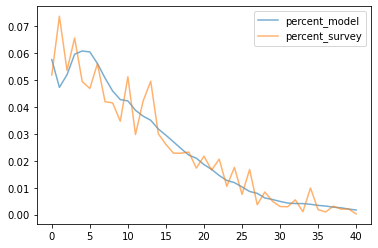

In [17]:
if len(_df_survey) > 0:
    _df_merged[['percent_model','percent_survey']].plot(alpha=0.6)
else:
    _df[['percent']].plot(alpha=0.6)

## Pierce County

In [18]:
_df_survey_pierce = _df_survey_county.loc[_df_survey_county.person_county=='Pierce']
_df_pierce = _df_county.loc[_df_county.person_county=='Pierce']

if len(_df_survey_pierce) > 0:
    _df_merged = _df_pierce.merge(_df_survey_pierce, on=['person_county', 'tautodist_bin'], suffixes=['_model','_survey'])
    print('model: '+ str((_df_merged['toexpfac_model']*_df_merged['tautodist_bin']).sum()*1.0/_df_merged['toexpfac_model'].sum()))
    print('survey: '+ str((_df_merged['toexpfac_survey']*_df_merged['tautodist_bin']).sum()*1.0/_df_merged['toexpfac_survey'].sum()))
else:
    print(str((_df['toexpfac']*_df['tautodist_bin']).sum()*1.0/_df['toexpfac'].sum()))


model: 12.81009572710265
survey: 11.618682631272339


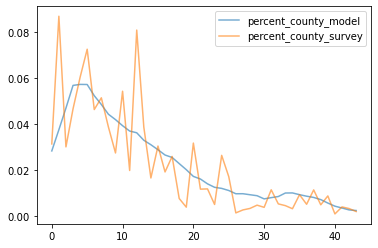

In [19]:
if len(_df_survey_pierce) > 0:
    _df_merged[['percent_county_model','percent_county_survey']].plot(alpha=0.6)
else:
    _df_pierce[['percent_county']].plot(alpha=0.6)

## Other Counties

In [20]:
_df_survey_pierce = _df_survey_county.loc[_df_survey_county.person_county!='Pierce']
_df_pierce = _df_county.loc[_df_county.person_county!='Pierce']

if len(_df_survey_pierce) > 0:
    _df_merged = _df_pierce.merge(_df_survey_pierce, on=['person_county', 'tautodist_bin'], suffixes=['_model','_survey'])
    print('model: '+ str((_df_merged['toexpfac_model']*_df_merged['tautodist_bin']).sum()*1.0/_df_merged['toexpfac_model'].sum()))
    print('survey: '+ str((_df_merged['toexpfac_survey']*_df_merged['tautodist_bin']).sum()*1.0/_df_merged['toexpfac_survey'].sum()))
else:
    print(str((_df['toexpfac']*_df['tautodist_bin']).sum()*1.0/_df['toexpfac'].sum()))


model: 9.727755678097612
survey: 10.114684654291523


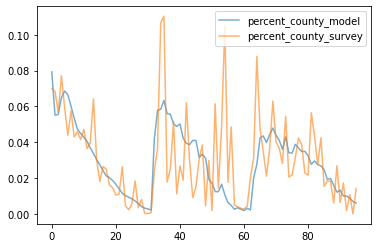

In [21]:
if len(_df_survey) > 0:
    _df_merged[['percent_county_model','percent_county_survey']].plot(alpha=0.6)
else:
    _df[['percent']].plot(alpha=0.6)

In [22]:
# Work trip distance to not usual workplace for non-WFH workers


# Average Trip Distance
Workers that work DO NOT work from home

In [23]:
# Non WFH Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_non_wfh.csv'))
df = df[df['pptyp'].isin(['Full-Time Worker','Part-Time Worker'])]
df = df[(df['dpurp'] == 'Work') & (df['dadtyp'].isin(['Other','Usual Workplace']))]
# df.groupby(['travdist_bin','']).sum()[['trexpfac']]
df_usual = df[df['dadtyp'] == 'Usual Workplace']
dist = (df_usual['trexpfac']*1.0*df_usual['travdist_bin']).sum()/df_usual['trexpfac'].sum()
print('Avg. distance to Usual Workplace: ' + str(dist))
df_other = df[df['dadtyp'] == 'Other']
dist = (df_other['trexpfac']*1.0*df_other['travdist_bin']).sum()/df_other['trexpfac'].sum()
print('Avg. distance to Other Workplace: ' + str(dist))
print('----------------------------------------')
# Non WFH Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_non_wfh.csv'))
df['wt_sum'] = df['trexpfac']*1.0*df['travdist_bin']
result = {}
for purp in pd.unique(df['dpurp']):
    _df = df[df['dpurp'] == purp]
    result[purp] = _df['wt_sum'].sum()/_df['trexpfac'].sum()
    
_df_non_wfh = pd.DataFrame.from_dict(result, orient='index').reset_index()
_df_non_wfh.columns = ['Purpose','Workers at Non-Home Location']
_df_non_wfh

Avg. distance to Usual Workplace: 9.03787972689618
Avg. distance to Other Workplace: 4.639983821813245
----------------------------------------


,Purpose,Workers at Non-Home Location
0,None/Home,5.6274
1,Work,8.1957
2,School,2.8641
3,Escort,5.1309
4,Personal Business,4.5223
5,Shop,3.7474
6,Meal,4.1862
7,Social,3.9711
8,Change Mode Inserted Purpose,47.2029


In [24]:
# WFH Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_wfh.csv'))
df = df[(df['dpurp'] == 'Work') & (df['dadtyp'].isin(['Other','Usual Workplace']))]

df_other = df[df['dadtyp'] == 'Other']
dist = (df_other['trexpfac']*1.0*df_other['travdist_bin']).sum()/df_other['trexpfac'].sum()
print('Avg. distance to Other Workplace: ' + str(dist))
print('----------------------------------')
df = pd.read_csv(os.path.join(working_dir,'trip_distance_wfh.csv'))
df['wt_sum'] = df['trexpfac']*1.0*df['travdist_bin']
result = {}
for purp in pd.unique(df['dpurp']):
    _df = df[df['dpurp'] == purp]
    result[purp] = _df['wt_sum'].sum()/_df['trexpfac'].sum()

_df_wfh = pd.DataFrame.from_dict(result, orient='index')
_df_wfh = _df_wfh.reset_index()
_df_wfh.columns = ['Purpose','WFH Workers']
_df_wfh

Avg. distance to Other Workplace: 12.830898176463926
----------------------------------


,Purpose,WFH Workers
0,None/Home,3.2505
1,Work,12.8146
2,School,4.8133
3,Escort,2.7629
4,Personal Business,2.2544
5,Shop,2.3753
6,Meal,2.9211
7,Social,2.2311
8,Change Mode Inserted Purpose,47.5484


In [25]:
# Non-Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_non_wfh.csv'))
df = df[-df['pptyp'].isin(['Full-Time Worker','Part-Time Worker'])]
df = df[(df['dpurp'] == 'Work') & (df['dadtyp'].isin(['Other','Usual Workplace']))]

# Non-Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_non_wfh.csv'))
df['wt_sum'] = df['trexpfac']*1.0*df['travdist_bin']
result = {}
for purp in pd.unique(df['dpurp']):
    _df = df[df['dpurp'] == purp]
    result[purp] = _df['wt_sum'].sum()/_df['trexpfac'].sum()
    
_df_non_worker = pd.DataFrame.from_dict(result, orient='index')
_df_non_worker = _df_non_worker.reset_index()
_df_non_worker.columns = ['Purpose','Non-Workers']
_df_non_worker

,Purpose,Non-Workers
0,None/Home,5.6274
1,Work,8.1957
2,School,2.8641
3,Escort,5.1309
4,Personal Business,4.5223
5,Shop,3.7474
6,Meal,4.1862
7,Social,3.9711
8,Change Mode Inserted Purpose,47.2029


In [26]:
_df = pd.merge(_df_non_wfh, _df_wfh).merge(_df_non_worker)

In [27]:
_df

,Purpose,Workers at Non-Home Location,WFH Workers,Non-Workers
0,None/Home,5.6274,3.2505,5.6274
1,Work,8.1957,12.8146,8.1957
2,School,2.8641,4.8133,2.8641
3,Escort,5.1309,2.7629,5.1309
4,Personal Business,4.5223,2.2544,4.5223
5,Shop,3.7474,2.3753,3.7474
6,Meal,4.1862,2.9211,4.1862
7,Social,3.9711,2.2311,3.9711
8,Change Mode Inserted Purpose,47.2029,47.5484,47.2029


## Pierce County

In [28]:
# Non WFH Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_non_wfh.csv'))
df = df.loc[df.person_county=='Pierce']
df = df[df['pptyp'].isin(['Full-Time Worker','Part-Time Worker'])]
df = df[(df['dpurp'] == 'Work') & (df['dadtyp'].isin(['Other','Usual Workplace']))]
# df.groupby(['travdist_bin','']).sum()[['trexpfac']]
df_usual = df[df['dadtyp'] == 'Usual Workplace']
dist = (df_usual['trexpfac']*1.0*df_usual['travdist_bin']).sum()/df_usual['trexpfac'].sum()
print('Avg. distance to Usual Workplace: ' + str(dist))
df_other = df[df['dadtyp'] == 'Other']
dist = (df_other['trexpfac']*1.0*df_other['travdist_bin']).sum()/df_other['trexpfac'].sum()
print('Avg. distance to Other Workplace: ' + str(dist))
print('----------------------------------------')
# Non WFH Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_non_wfh.csv'))
df = df.loc[df.person_county=='Pierce']
df['wt_sum'] = df['trexpfac']*1.0*df['travdist_bin']
result = {}
for purp in pd.unique(df['dpurp']):
    _df = df[df['dpurp'] == purp]
    result[purp] = _df['wt_sum'].sum()/_df['trexpfac'].sum()
    
_df_non_wfh = pd.DataFrame.from_dict(result, orient='index').reset_index()
_df_non_wfh.columns = ['Purpose','Workers at Non-Home Location']
_df_non_wfh

Avg. distance to Usual Workplace: 10.980636645020331
Avg. distance to Other Workplace: 5.197021536581641
----------------------------------------


,Purpose,Workers at Non-Home Location
0,None/Home,5.8172
1,Work,9.8514
2,School,2.8047
3,Escort,5.2162
4,Personal Business,4.6701
5,Shop,4.0326
6,Meal,4.5722
7,Social,3.8830
8,Change Mode Inserted Purpose,80.1656


In [29]:
# WFH Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_wfh.csv'))
df = df.loc[df.person_county=='Pierce']
df = df[(df['dpurp'] == 'Work') & (df['dadtyp'].isin(['Other','Usual Workplace']))]

df_other = df[df['dadtyp'] == 'Other']
dist = (df_other['trexpfac']*1.0*df_other['travdist_bin']).sum()/df_other['trexpfac'].sum()
print('Avg. distance to Other Workplace: ' + str(dist))
print('----------------------------------')
df = pd.read_csv(os.path.join(working_dir,'trip_distance_wfh.csv'))
df = df.loc[df.person_county=='Pierce']
df['wt_sum'] = df['trexpfac']*1.0*df['travdist_bin']
result = {}
for purp in pd.unique(df['dpurp']):
    _df = df[df['dpurp'] == purp]
    result[purp] = _df['wt_sum'].sum()/_df['trexpfac'].sum()

_df_wfh = pd.DataFrame.from_dict(result, orient='index')
_df_wfh = _df_wfh.reset_index()
_df_wfh.columns = ['Purpose','WFH Workers']
_df_wfh

Avg. distance to Other Workplace: 14.168096054888508
----------------------------------


,Purpose,WFH Workers
0,None/Home,3.3105
1,Work,14.1646
2,School,4.9299
3,Escort,2.8195
4,Personal Business,2.3359
5,Shop,2.5259
6,Meal,3.1539
7,Social,2.0462
8,Change Mode Inserted Purpose,74.0000


In [30]:
# Non-Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_non_wfh.csv'))
df = df.loc[df.person_county=='Pierce']
df = df[-df['pptyp'].isin(['Full-Time Worker','Part-Time Worker'])]
df = df[(df['dpurp'] == 'Work') & (df['dadtyp'].isin(['Other','Usual Workplace']))]

# Non-Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_non_wfh.csv'))
df = df.loc[df.person_county=='Pierce']
df['wt_sum'] = df['trexpfac']*1.0*df['travdist_bin']
result = {}
for purp in pd.unique(df['dpurp']):
    _df = df[df['dpurp'] == purp]
    result[purp] = _df['wt_sum'].sum()/_df['trexpfac'].sum()
    
_df_non_worker = pd.DataFrame.from_dict(result, orient='index')
_df_non_worker = _df_non_worker.reset_index()
_df_non_worker.columns = ['Purpose','Non-Workers']
_df_non_worker

,Purpose,Non-Workers
0,None/Home,5.8172
1,Work,9.8514
2,School,2.8047
3,Escort,5.2162
4,Personal Business,4.6701
5,Shop,4.0326
6,Meal,4.5722
7,Social,3.8830
8,Change Mode Inserted Purpose,80.1656


In [31]:
_df = pd.merge(_df_non_wfh, _df_wfh).merge(_df_non_worker)
_df

,Purpose,Workers at Non-Home Location,WFH Workers,Non-Workers
0,None/Home,5.8172,3.3105,5.8172
1,Work,9.8514,14.1646,9.8514
2,School,2.8047,4.9299,2.8047
3,Escort,5.2162,2.8195,5.2162
4,Personal Business,4.6701,2.3359,4.6701
5,Shop,4.0326,2.5259,4.0326
6,Meal,4.5722,3.1539,4.5722
7,Social,3.8830,2.0462,3.8830
8,Change Mode Inserted Purpose,80.1656,74.0000,80.1656


## Other Counties

In [32]:
# Non WFH Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_non_wfh.csv'))
df = df.loc[df.person_county!='Pierce']
df = df[df['pptyp'].isin(['Full-Time Worker','Part-Time Worker'])]
df = df[(df['dpurp'] == 'Work') & (df['dadtyp'].isin(['Other','Usual Workplace']))]
# df.groupby(['travdist_bin','']).sum()[['trexpfac']]
df_usual = df[df['dadtyp'] == 'Usual Workplace']
dist = (df_usual['trexpfac']*1.0*df_usual['travdist_bin']).sum()/df_usual['trexpfac'].sum()
print('Avg. distance to Usual Workplace: ' + str(dist))
df_other = df[df['dadtyp'] == 'Other']
dist = (df_other['trexpfac']*1.0*df_other['travdist_bin']).sum()/df_other['trexpfac'].sum()
print('Avg. distance to Other Workplace: ' + str(dist))
print('----------------------------------------')
# Non WFH Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_non_wfh.csv'))
df = df.loc[df.person_county!='Pierce']
df['wt_sum'] = df['trexpfac']*1.0*df['travdist_bin']
result = {}
for purp in pd.unique(df['dpurp']):
    _df = df[df['dpurp'] == purp]
    result[purp] = _df['wt_sum'].sum()/_df['trexpfac'].sum()
    
_df_non_wfh = pd.DataFrame.from_dict(result, orient='index').reset_index()
_df_non_wfh.columns = ['Purpose','Workers at Non-Home Location']
_df_non_wfh

Avg. distance to Usual Workplace: 8.639418193586934
Avg. distance to Other Workplace: 4.526973384525282
----------------------------------------


,Purpose,Workers at Non-Home Location
0,None/Home,5.5799
1,Work,7.8557
2,School,2.8801
3,Escort,5.1085
4,Personal Business,4.4828
5,Shop,3.6737
6,Meal,4.1061
7,Social,3.9931
8,Change Mode Inserted Purpose,45.9026


Only workers that work **from home**

In [33]:
# WFH Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_wfh.csv'))
df = df.loc[df.person_county!='Pierce']
df = df[(df['dpurp'] == 'Work') & (df['dadtyp'].isin(['Other','Usual Workplace']))]

df_other = df[df['dadtyp'] == 'Other']
dist = (df_other['trexpfac']*1.0*df_other['travdist_bin']).sum()/df_other['trexpfac'].sum()
print('Avg. distance to Other Workplace: ' + str(dist))
print('----------------------------------')
df = pd.read_csv(os.path.join(working_dir,'trip_distance_wfh.csv'))
df = df.loc[df.person_county!='Pierce']
df['wt_sum'] = df['trexpfac']*1.0*df['travdist_bin']
result = {}
for purp in pd.unique(df['dpurp']):
    _df = df[df['dpurp'] == purp]
    result[purp] = _df['wt_sum'].sum()/_df['trexpfac'].sum()

_df_wfh = pd.DataFrame.from_dict(result, orient='index')
_df_wfh = _df_wfh.reset_index()
_df_wfh.columns = ['Purpose','WFH Workers']
_df_wfh

Avg. distance to Other Workplace: 12.428960742432054
----------------------------------


,Purpose,WFH Workers
0,None/Home,3.2338
1,Work,12.4095
2,School,4.7813
3,Escort,2.7464
4,Personal Business,2.2321
5,Shop,2.3338
6,Meal,2.8616
7,Social,2.2808
8,Change Mode Inserted Purpose,47.2609


In [34]:
# Non-Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_non_wfh.csv'))
df = df.loc[df.person_county!='Pierce']
df = df[-df['pptyp'].isin(['Full-Time Worker','Part-Time Worker'])]
df = df[(df['dpurp'] == 'Work') & (df['dadtyp'].isin(['Other','Usual Workplace']))]

# Non-Workers
df = pd.read_csv(os.path.join(working_dir,'trip_distance_non_wfh.csv'))
df = df.loc[df.person_county!='Pierce']
df['wt_sum'] = df['trexpfac']*1.0*df['travdist_bin']
result = {}
for purp in pd.unique(df['dpurp']):
    _df = df[df['dpurp'] == purp]
    result[purp] = _df['wt_sum'].sum()/_df['trexpfac'].sum()
    
_df_non_worker = pd.DataFrame.from_dict(result, orient='index')
_df_non_worker = _df_non_worker.reset_index()
_df_non_worker.columns = ['Purpose','Non-Workers']
_df_non_worker

,Purpose,Non-Workers
0,None/Home,5.5799
1,Work,7.8557
2,School,2.8801
3,Escort,5.1085
4,Personal Business,4.4828
5,Shop,3.6737
6,Meal,4.1061
7,Social,3.9931
8,Change Mode Inserted Purpose,45.9026


In [35]:
_df = pd.merge(_df_non_wfh, _df_wfh).merge(_df_non_worker)
_df

,Purpose,Workers at Non-Home Location,WFH Workers,Non-Workers
0,None/Home,5.5799,3.2338,5.5799
1,Work,7.8557,12.4095,7.8557
2,School,2.8801,4.7813,2.8801
3,Escort,5.1085,2.7464,5.1085
4,Personal Business,4.4828,2.2321,4.4828
5,Shop,3.6737,2.3338,3.6737
6,Meal,4.1061,2.8616,4.1061
7,Social,3.9931,2.2808,3.9931
8,Change Mode Inserted Purpose,45.9026,47.2609,45.9026


Average Trip Distance by Purpose and Worker/Person Type

# VMT

Workers that Work from Home

In [36]:
df = pd.read_csv(os.path.join(working_dir,'vmt_wfh.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey','vmt_wfh.csv'))

pd.options.display.float_format = '{:,.2f}'.format
_df = df[(df['mode'].isin(['SOV','HOV2','HOV3+']))&
   (df['dorp']==1) &
   (df['pptyp'].isin(['Full-Time Worker','Part-Time Worker']))].groupby('dpurp').sum()[['travdist_wt']]
_df['VMT per Person (Model)'] = _df['travdist_wt']/total_wfh_workers

_df_survey = df_survey[(df_survey['mode'].isin(['SOV','HOV2','HOV3+']))&
   (df_survey['dorp']==1) &
   (df_survey['pptyp'].isin(['Full-Time Worker','Part-Time Worker']))].groupby('dpurp').sum()[['travdist_wt']]
_df_survey['VMT per Person (Model)'] = _df_survey['travdist_wt']/total_wfh_workers_survey

_df = _df.merge(_df_survey, left_index=True, right_index=True, suffixes=['_model','_survey'])
_df.loc['Total',:] = _df.sum()
_df[['travdist_wt_model','travdist_wt_survey']] = _df[['travdist_wt_model','travdist_wt_survey']].astype('int')
_df.rename(columns={'travdist_wt_model': 'Total VMT (Model)', 'travidst_wt_survey': 'Total VMT (Survey)'},
                   inplace=True)
_df

,Total VMT (Model),VMT per Person (Model)_model,travdist_wt_survey,VMT per Person (Model)_survey
dpurp,,,,
Change Mode Inserted Purpose,1340,0.01,22087,0.18
Escort,132289,1.07,102084,0.82
Meal,30202,0.24,18337,0.15
None/Home,399272,3.23,275291,2.22
Personal Business,124334,1.00,32471,0.26
School,4666,0.04,442,0.00
Shop,150225,1.21,217770,1.76
Social,86824,0.70,125873,1.02
Work,36791,0.30,28235,0.23


In [37]:
df = pd.read_csv(os.path.join(working_dir,'vmt_nonwfh.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey','vmt_nonwfh.csv'))

pd.options.display.float_format = '{:,.2f}'.format
_df = df[(df['mode'].isin(['SOV','HOV2','HOV3+']))&
   (df['dorp']==1) &
   (df['pptyp'].isin(['Full-Time Worker','Part-Time Worker']))].groupby('dpurp').sum()[['travdist_wt']]
_df['VMT per Person (Model)'] = _df['travdist_wt']/total_nonwfh_workers

_df_survey = df_survey[(df_survey['mode'].isin(['SOV','HOV2','HOV3+']))&
   (df_survey['dorp']==1) &
   (df_survey['pptyp'].isin(['Full-Time Worker','Part-Time Worker']))].groupby('dpurp').sum()[['travdist_wt']]
_df_survey['VMT per Person (Model)'] = _df_survey['travdist_wt']/total_nonwfh_workers_survey

_df = _df.merge(_df_survey, left_index=True, right_index=True, suffixes=['_model','_survey'])
_df.loc['Total',:] = _df.sum()
_df[['travdist_wt_model','travdist_wt_survey']] = _df[['travdist_wt_model','travdist_wt_survey']].astype('int')
_df.rename(columns={'travdist_wt_model': 'Total VMT (Model)', 'travidst_wt_survey': 'Total VMT (Survey)'},
                   inplace=True)
_df

,Total VMT (Model),VMT per Person (Model)_model,travdist_wt_survey,VMT per Person (Model)_survey
dpurp,,,,
Change Mode Inserted Purpose,534974,0.28,140005,0.07
Escort,2669561,1.40,2680996,1.42
Meal,1709681,0.90,1532333,0.81
None/Home,16973920,8.90,13921007,7.35
Personal Business,2024274,1.06,2260473,1.19
School,190722,0.10,55732,0.03
Shop,2332934,1.22,3274347,1.73
Social,2468791,1.29,2734787,1.44
Work,17023830,8.93,16329306,8.63


## Pierce County

In [38]:
df = pd.read_csv(os.path.join(working_dir,'vmt_wfh.csv'))
df = df.loc[df.person_county=='Pierce']
df_survey = pd.read_csv(os.path.join(working_dir,'survey','vmt_wfh.csv'))
df_survey = df_survey.loc[df_survey.person_county=='Pierce']

pd.options.display.float_format = '{:,.2f}'.format
_df = df[(df['mode'].isin(['SOV','HOV2','HOV3+']))&
   (df['dorp']==1) &
   (df['pptyp'].isin(['Full-Time Worker','Part-Time Worker']))].groupby('dpurp').sum()[['travdist_wt']]
_df['VMT per Person (Model)'] = _df['travdist_wt']/total_wfh_workers

_df_survey = df_survey[(df_survey['mode'].isin(['SOV','HOV2','HOV3+']))&
   (df_survey['dorp']==1) &
   (df_survey['pptyp'].isin(['Full-Time Worker','Part-Time Worker']))].groupby('dpurp').sum()[['travdist_wt']]
_df_survey['VMT per Person (Model)'] = _df_survey['travdist_wt']/total_wfh_workers_survey

_df = _df.merge(_df_survey, left_index=True, right_index=True, suffixes=['_model','_survey'])
_df.loc['Total',:] = _df.sum()
_df[['travdist_wt_model','travdist_wt_survey']] = _df[['travdist_wt_model','travdist_wt_survey']].astype('int')
_df.rename(columns={'travdist_wt_model': 'Total VMT (Model)', 'travidst_wt_survey': 'Total VMT (Survey)'},
                   inplace=True)
_df

,Total VMT (Model),VMT per Person (Model)_model,travdist_wt_survey,VMT per Person (Model)_survey
dpurp,,,,
Escort,30481,0.25,35339,0.29
Meal,6342,0.05,1504,0.01
None/Home,86608,0.70,54474,0.44
Personal Business,27055,0.22,3172,0.03
Shop,34332,0.28,34936,0.28
Social,16601,0.13,19926,0.16
Work,9033,0.07,12042,0.10
Total,210455,1.70,161396,1.30


In [39]:
df = pd.read_csv(os.path.join(working_dir,'vmt_nonwfh.csv'))
df = df.loc[df.person_county=='Pierce']
df_survey = pd.read_csv(os.path.join(working_dir,'survey','vmt_nonwfh.csv'))
df_survey = df_survey.loc[df_survey.person_county=='Pierce']

pd.options.display.float_format = '{:,.2f}'.format
_df = df[(df['mode'].isin(['SOV','HOV2','HOV3+']))&
   (df['dorp']==1) &
   (df['pptyp'].isin(['Full-Time Worker','Part-Time Worker']))].groupby('dpurp').sum()[['travdist_wt']]
_df['VMT per Person (Model)'] = _df['travdist_wt']/total_nonwfh_workers

_df_survey = df_survey[(df_survey['mode'].isin(['SOV','HOV2','HOV3+']))&
   (df_survey['dorp']==1) &
   (df_survey['pptyp'].isin(['Full-Time Worker','Part-Time Worker']))].groupby('dpurp').sum()[['travdist_wt']]
_df_survey['VMT per Person (Model)'] = _df_survey['travdist_wt']/total_nonwfh_workers_survey

_df = _df.merge(_df_survey, left_index=True, right_index=True, suffixes=['_model','_survey'])
_df.loc['Total',:] = _df.sum()
_df[['travdist_wt_model','travdist_wt_survey']] = _df[['travdist_wt_model','travdist_wt_survey']].astype('int')
_df.rename(columns={'travdist_wt_model': 'Total VMT (Model)', 'travidst_wt_survey': 'Total VMT (Survey)'},
                   inplace=True)
_df

,Total VMT (Model),VMT per Person (Model)_model,travdist_wt_survey,VMT per Person (Model)_survey
dpurp,,,,
Change Mode Inserted Purpose,40568,0.02,2057,0.00
Escort,537682,0.28,525218,0.28
Meal,310439,0.16,479837,0.25
None/Home,3356121,1.76,2873735,1.52
Personal Business,394147,0.21,555646,0.29
School,45708,0.02,4708,0.00
Shop,462735,0.24,546278,0.29
Social,441161,0.23,469736,0.25
Work,3558810,1.87,3268367,1.73


## Other Counties

In [40]:
df = pd.read_csv(os.path.join(working_dir,'vmt_wfh.csv'))
df = df.loc[df.person_county!='Pierce']
df_survey = pd.read_csv(os.path.join(working_dir,'survey','vmt_wfh.csv'))
df_survey = df_survey.loc[df_survey.person_county!='Pierce']

pd.options.display.float_format = '{:,.2f}'.format
_df = df[(df['mode'].isin(['SOV','HOV2','HOV3+']))&
   (df['dorp']==1) &
   (df['pptyp'].isin(['Full-Time Worker','Part-Time Worker']))].groupby('dpurp').sum()[['travdist_wt']]
_df['VMT per Person (Model)'] = _df['travdist_wt']/total_wfh_workers

_df_survey = df_survey[(df_survey['mode'].isin(['SOV','HOV2','HOV3+']))&
   (df_survey['dorp']==1) &
   (df_survey['pptyp'].isin(['Full-Time Worker','Part-Time Worker']))].groupby('dpurp').sum()[['travdist_wt']]
_df_survey['VMT per Person (Model)'] = _df_survey['travdist_wt']/total_wfh_workers_survey

_df = _df.merge(_df_survey, left_index=True, right_index=True, suffixes=['_model','_survey'])
_df.loc['Total',:] = _df.sum()
_df[['travdist_wt_model','travdist_wt_survey']] = _df[['travdist_wt_model','travdist_wt_survey']].astype('int')
_df.rename(columns={'travdist_wt_model': 'Total VMT (Model)', 'travidst_wt_survey': 'Total VMT (Survey)'},
                   inplace=True)
_df

,Total VMT (Model),VMT per Person (Model)_model,travdist_wt_survey,VMT per Person (Model)_survey
dpurp,,,,
Change Mode Inserted Purpose,1249,0.01,22087,0.18
Escort,101807,0.82,66744,0.54
Meal,23859,0.19,16833,0.14
None/Home,312663,2.53,220816,1.78
Personal Business,97279,0.79,29299,0.24
School,3509,0.03,442,0.00
Shop,115892,0.94,182833,1.48
Social,70222,0.57,105947,0.86
Work,27758,0.22,16193,0.13


In [41]:
df = pd.read_csv(os.path.join(working_dir,'vmt_nonwfh.csv'))
df = df.loc[df.person_county!='Pierce']
df_survey = pd.read_csv(os.path.join(working_dir,'survey','vmt_nonwfh.csv'))
df_survey = df_survey.loc[df_survey.person_county!='Pierce']

pd.options.display.float_format = '{:,.2f}'.format
_df = df[(df['mode'].isin(['SOV','HOV2','HOV3+']))&
   (df['dorp']==1) &
   (df['pptyp'].isin(['Full-Time Worker','Part-Time Worker']))].groupby('dpurp').sum()[['travdist_wt']]
_df['VMT per Person (Model)'] = _df['travdist_wt']/total_nonwfh_workers

_df_survey = df_survey[(df_survey['mode'].isin(['SOV','HOV2','HOV3+']))&
   (df_survey['dorp']==1) &
   (df_survey['pptyp'].isin(['Full-Time Worker','Part-Time Worker']))].groupby('dpurp').sum()[['travdist_wt']]
_df_survey['VMT per Person (Model)'] = _df_survey['travdist_wt']/total_nonwfh_workers_survey

_df = _df.merge(_df_survey, left_index=True, right_index=True, suffixes=['_model','_survey'])
_df.loc['Total',:] = _df.sum()
_df[['travdist_wt_model','travdist_wt_survey']] = _df[['travdist_wt_model','travdist_wt_survey']].astype('int')
_df.rename(columns={'travdist_wt_model': 'Total VMT (Model)', 'travidst_wt_survey': 'Total VMT (Survey)'},
                   inplace=True)
_df

,Total VMT (Model),VMT per Person (Model)_model,travdist_wt_survey,VMT per Person (Model)_survey
dpurp,,,,
Change Mode Inserted Purpose,494406,0.26,137948,0.07
Escort,2131878,1.12,2155777,1.14
Meal,1399242,0.73,1052495,0.56
None/Home,13617798,7.14,11047271,5.84
Personal Business,1630126,0.85,1704827,0.90
School,145014,0.08,51023,0.03
Shop,1870198,0.98,2728069,1.44
Social,2027629,1.06,2265051,1.20
Work,13465020,7.06,13060939,6.90


Workers that do NOT Work from Home